<a href="https://colab.research.google.com/github/Priyanshi1704/Machine-LearningLab/blob/main/Ml_assignment_9_SLP_for_multiclass_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('default')
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# DataSet Loading and Data preprocessing

In [ ]:
# Iris Dataset
from sklearn import datasets
data = datasets.load_iris()
'''
# Wine Dataset
from sklearn.datasets import load_wine
data = load_wine()
'''

'\n# Wine Dataset\nfrom sklearn.datasets import load_wine\ndata = load_wine()\n'

In [ ]:
print("The dictonary keys are associated with data:\n", data.keys())
print("-"*100)
print("Data:\n", data['data'])
print("-"*100)
print("Name of the features (Independent features): \n", data['feature_names'])
print("-"*100)
print("Name of the dependent features: ", data['target_names'])
print("-"*100)

The dictonary keys are associated with data:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
----------------------------------------------------------------------------------------------------
Data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [

In [ ]:
y_actual = np.array(data['target'])
features = np.array(data['data'])
print("No of the feature vectors: %d"%features.shape[1])
print("No of the Patterns: %d"%features.shape[0])
print("No of classes:", list(set(data['target'])))

No of the feature vectors: 4
No of the Patterns: 150
No of classes: [0, 1, 2]


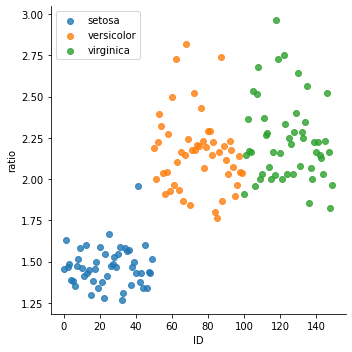

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

In [ ]:
# data preprocessing (min max scalling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

In [ ]:
# shuffel the datasample
from sklearn.utils import shuffle
import numpy as np
features, y_actual = shuffle(features, y_actual)

# Train Set, Validation Set and Test Set (Just for checking)

In [ ]:
# Train test validation
from sklearn.model_selection import train_test_split
import random
# train(70%), validation (10%), and test(20%)
X_train, X_test, y_train, y_test = train_test_split(features,y_actual , test_size=0.3, random_state=random.randint(30,100))
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.14, random_state=random.randint(30,100))
print("Size of the train dataset:" + str(X_train.shape))
print("Size of the validation dataset:" + str(X_validation.shape))
print("Size of the test dataset:" + str(X_test.shape))

Size of the train dataset:(105, 4)
Size of the validation dataset:(7, 4)
Size of the test dataset:(38, 4)


# 5 fold cross validation

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
def fold(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  print(kf)
  all_x_train = []
  all_x_test = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    all_x_train.append(X_train)
    all_x_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  all_x_train, all_x_test, all_y_train, all_y_test  = np.array(all_x_train), np.array(all_x_test), np.array(all_y_train), np.array(all_y_test)
  return all_x_train, all_x_test, all_y_train, all_y_test

In [ ]:
all_x_train, all_x_test, all_y_train, all_y_test = fold(features,y_actual)

KFold(n_splits=5, random_state=1000, shuffle=True)


In [ ]:
print(all_x_train, all_x_test, all_y_train, all_y_test)

[[[0.19444444 0.625      0.05084746 0.08333333]
  [0.80555556 0.66666667 0.86440678 1.        ]
  [0.02777778 0.5        0.05084746 0.04166667]
  ...
  [0.19444444 0.625      0.10169492 0.20833333]
  [0.94444444 0.25       1.         0.91666667]
  [0.33333333 0.625      0.05084746 0.04166667]]

 [[0.19444444 0.625      0.05084746 0.08333333]
  [0.80555556 0.66666667 0.86440678 1.        ]
  [0.02777778 0.5        0.05084746 0.04166667]
  ...
  [0.19444444 0.         0.42372881 0.375     ]
  [0.55555556 0.29166667 0.66101695 0.70833333]
  [0.33333333 0.625      0.05084746 0.04166667]]

 [[0.19444444 0.625      0.05084746 0.08333333]
  [0.80555556 0.66666667 0.86440678 1.        ]
  [0.02777778 0.5        0.05084746 0.04166667]
  ...
  [0.19444444 0.625      0.10169492 0.20833333]
  [0.94444444 0.25       1.         0.91666667]
  [0.33333333 0.625      0.05084746 0.04166667]]

 [[0.80555556 0.66666667 0.86440678 1.        ]
  [0.25       0.29166667 0.49152542 0.54166667]
  [0.55555556 0.

# One Hot Encoding

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoding(y):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(y)
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

In [ ]:
# adding one column with all once
def add_intercept(x):
  intercept = np.ones((x.shape[0], 1))
  return np.concatenate((intercept, x), axis=1)

In [ ]:
onehot = one_hot_encoding(y_actual)
print(onehot)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0.

In [ ]:
def loss(h, y):
  return sum(-y*np.log(h) - (1-y)*np.log(1-h))

In [ ]:
def mse(h, y):
  return (((h-y)**2).mean())/2
def mse_in_iter(h, y):
  return (sum((h-y)**2))/2

In [ ]:
def predict(x, y, all_weights):
  # add intercept into x values
  X = add_intercept(x)
  y = []
  for i in range(len(X)):
    d1 = np.dot(all_weights[0], X[i].T)
    d2 = np.dot(all_weights[1], X[i].T)
    d3 = np.dot(all_weights[2], X[i].T)
    if (d1 > d2 and d1 > d3):
      y.append(0)
    elif (d2 > d1 and d2 > d3):
      y.append(1)
    else :
      y.append(2)
  return y

In [ ]:
def slp(x, y, lr=0.01, roh = 0.000001, num_iter=100):
  x = add_intercept(x) # add intercept in the feature vectors (in independent varibales)
  all_hypothesis = []
  all_weights = []
  final_hypothesis = []
  classes = list(set(y)) # find how many classes are there...
  d = np.ones(len(classes))
  # calculate the weight vector (2D array, shape will be (no_of_classes*no_of_feature_vector))
  for i in range(0, len(classes)):
    weight = np.ones(x.shape[1])*0.1
    all_weights.append(weight)
  all_weights = np.array(all_weights)
  converged = True
  epoch = 0
  # make one hot encoding
  y_onehot = one_hot_encoding(y)
  current_loss = 0
  while converged:
    #logloss_error = 0
    mse_error = 0   # at the starting of each epoch mse will be 0
    for i in range(0, x.shape[0]): # for each training sample one by one
      hypo = np.ones(len(classes))
      for k in range(0, len(classes)): # for calculating d values
        z = np.dot(x[i], all_weights[k].T)
        #h = sigmoid(z)  # hypothesis
        h = z
        hypo[k] = h
        if (h>=0):
          d[k] = 1 # predicted one
        if (h<0):
          d[k] = 0 # predicted one
      # calculate the errror (mse and logloss)
      # but we are converging through the logloss only
      mse_error = mse_error + mse_in_iter(d, y_onehot[i])
      #logloss_error = logloss_error + loss(hypo, y_onehot[i])
      # Weight updation using the current training sample
      update_weights = []
      for j in range(0, len(classes)):
        all_weights[j] = all_weights[j] + x[i]*(y_onehot[i][j]-d[j])*lr
    print(f'Epoch: {epoch} ------>' + f' ------> Mse: {mse_error/x.shape[0]} \t ')
    if(abs(current_loss - (mse_error/x.shape[0])) <= roh):
        print(f"Converged through roh criteria: epoch = {i}")
        break # converged
    current_loss = mse_error/x.shape[0] # save the previous error to calculate the diff in current error and previous error
    epoch = epoch + 1
    if (epoch== num_iter):
      print("Converged through maximum epoch no criteria...") # converged
      # return the traning accuracy also
      return all_weights
  # return the accuracy also
  y_predicted = predict_inner(x, all_weights)
  y_predicted = np.array(y_predicted)
  acc = accuracy_score(y, y_predicted)*100
  print("Train Accuracy: " + str(acc))
  return all_weights

In [ ]:
all_weights = slp(X_train, y_train, lr=0.3, roh = 0.000001, num_iter=1000)

Epoch: 0 ------> ------> Mse: 0.3952380952380952 	 
Epoch: 1 ------> ------> Mse: 0.2714285714285714 	 
Epoch: 2 ------> ------> Mse: 0.2904761904761905 	 
Epoch: 3 ------> ------> Mse: 0.26666666666666666 	 
Epoch: 4 ------> ------> Mse: 0.23333333333333334 	 
Epoch: 5 ------> ------> Mse: 0.2571428571428571 	 
Epoch: 6 ------> ------> Mse: 0.21904761904761905 	 
Epoch: 7 ------> ------> Mse: 0.20952380952380953 	 
Epoch: 8 ------> ------> Mse: 0.2523809523809524 	 
Epoch: 9 ------> ------> Mse: 0.21904761904761905 	 
Epoch: 10 ------> ------> Mse: 0.2523809523809524 	 
Epoch: 11 ------> ------> Mse: 0.21904761904761905 	 
Epoch: 12 ------> ------> Mse: 0.23809523809523808 	 
Epoch: 13 ------> ------> Mse: 0.20952380952380953 	 
Epoch: 14 ------> ------> Mse: 0.18095238095238095 	 
Epoch: 15 ------> ------> Mse: 0.20952380952380953 	 
Epoch: 16 ------> ------> Mse: 0.19047619047619047 	 
Epoch: 17 ------> ------> Mse: 0.20952380952380953 	 
Epoch: 18 ------> ------> Mse: 0.18571428571

In [ ]:
y_predicted = predict(X_train, y_train, all_weights)
y_predicted = np.array(y_predicted)
print(accuracy_score(y_train , y_predicted))

0.7428571428571429


In [ ]:
y_predicted = predict(X_test, y_test, all_weights)
y_predicted = np.array(y_predicted)
print(accuracy_score(y_test , y_predicted ))

0.8421052631578947


In [ ]:
y_predicted = predict(X_validation, y_validation, all_weights)
y_predicted = np.array(y_predicted)
print(accuracy_score(y_validation, y_predicted ))

1.0


In [ ]:
# Take average of all folds
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
accuracy = np.ones(5)
precision = np.ones(5)
recall = np.ones(5)
f1 = np.ones(5)
for i in range(0,5):
  all_weights = slp(all_x_train[i], all_y_train[i], lr=0.3, roh = 0.000001, num_iter=100)
  y_predicted = predict(all_x_test[i], all_y_test[i], all_weights)
  y_predicted = np.array(y_predicted)
  accuracy[i] = accuracy_score(all_y_test[i] , y_predicted)*100
  print("Accuracy Score:", accuracy[i])
  precision[i] = precision_score(all_y_test[i], y_predicted, labels=[0,1,2], average='micro')*100
  recall[i] = recall_score(all_y_test[i], y_predicted, labels=[0,1,2], average='micro')*100
  f1[i] = f1_score(all_y_test[i], y_predicted, labels=[0,1,2], average='micro')*100
  print("Training Accuracy: ", accuracy[i])
  print("Prescission Score:", precision[i])
  print("Recall Score : ", recall_score(all_y_test[i], y_predicted, labels=[0,1,2], average='micro')*100) 
  print('F1 Score : ', f1_score(all_y_test[i], y_predicted, labels=[0,1,2], average='micro')*100)
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], y_predicted)))
  print("Classification Report for 3-classes: ")
  out_labels = [0,1,2]
  print(metrics.classification_report(all_y_test[i], y_predicted, out_labels, digits=3))

Epoch: 0 ------> ------> Mse: 0.30416666666666664 	 
Epoch: 1 ------> ------> Mse: 0.2625 	 
Epoch: 2 ------> ------> Mse: 0.22916666666666666 	 
Epoch: 3 ------> ------> Mse: 0.24166666666666667 	 
Epoch: 4 ------> ------> Mse: 0.2708333333333333 	 
Epoch: 5 ------> ------> Mse: 0.22916666666666666 	 
Epoch: 6 ------> ------> Mse: 0.2 	 
Epoch: 7 ------> ------> Mse: 0.19166666666666668 	 
Epoch: 8 ------> ------> Mse: 0.17916666666666667 	 
Epoch: 9 ------> ------> Mse: 0.21666666666666667 	 
Epoch: 10 ------> ------> Mse: 0.21666666666666667 	 
Converged through roh criteria: epoch = 119
Train Accuracy: 75.83333333333333
Accuracy Score: 93.33333333333333
Training Accuracy:  93.33333333333333
Prescission Score: 93.33333333333333
Recall Score :  93.33333333333333
F1 Score :  93.33333333333333
Confusion Matrix : 
[[ 9  0  0]
 [ 2  5  0]
 [ 0  0 14]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0      0.818     1.000     0.900  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 10 ------> ------> Mse: 0.15833333333333333 	 
Epoch: 11 ------> ------> Mse: 0.15833333333333333 	 
Converged through roh criteria: epoch = 119
Train Accuracy: 77.5
Accuracy Score: 73.33333333333333
Training Accuracy:  73.33333333333333
Prescission Score: 73.33333333333333
Recall Score :  73.33333333333333
F1 Score :  73.33333333333333
Confusion Matrix : 
[[ 9  1  0]
 [ 6  2  0]
 [ 0  1 11]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0      0.600     0.900     0.720        10
           1      0.500     0.250     0.333         8
           2      1.000     0.917     0.957        12

    accuracy                          0.733        30
   macro avg      0.700     0.689     0.670        30
weighted avg      0.733     0.733     0.711        30



In [ ]:
print("Mean Accuracy: ",accuracy.mean())
print("Mean precission: ", precision.mean())
print("Mean recall: ",recall.mean())
print("Mean f1 score: ",f1.mean())

Mean Accuracy:  70.66666666666666
Mean precission:  70.66666666666666
Mean recall:  70.66666666666666
Mean f1 score:  70.66666666666666


# Hyperparameter tuning on the validation set is required to be done.

In [ ]:
# Do the splitting on the first fold
# Train test validation
from sklearn.model_selection import train_test_split
import random
# train(70%), validation (10%), and test(20%)
X_train, X_validation, y_train, y_validation = train_test_split(all_x_train[0], all_y_train[0] , test_size=0.1, random_state=random.randint(30,100))
print("Size of the train dataset:" + str(X_train.shape))
print("Size of the validation dataset:" + str(X_validation.shape))

Size of the train dataset:(108, 4)
Size of the validation dataset:(12, 4)


In [ ]:
# Hyperparameter tuning on the validation set is required to be done.
# here we are choosing the best hyperparameters based on the accuracy value
def get_best_hyperparameter(X_train, y_train, X_validation, y_validation, alpha, roh, num_iter):
  valid_hypothesis = []
  validation_accuracy = []
  x = add_intercept(X_validation)
  for i in range(0, len(alpha)):
    all_hypothesis_valid = []
    final_hypothesis = []
    all_weights = slp(X_train, y_train, lr=alpha[i], roh = roh[i], num_iter=num_iter[i])
    y_predicted = predict(X_validation, y_validation, all_weights)
    y_predicted = np.array(y_predicted)
    accuracy[i] = accuracy_score(y_validation, y_predicted)*100
    print("Validation Accuracy: " + str(accuracy[i]))
    # calculate the accuracy in the validation set
  max_index = np.argmax(accuracy)
  print("Best hyperparameter value is alpha = " + str(alpha[max_index]) + ", roh = " + str(roh[max_index]) + " and num_iter = " + str(num_iter[max_index]))
  print("Best Hyperparameter accuracy: " + str(accuracy[max_index]))

In [ ]:
alpha = [0.01, 0.0001, 0.1, 0.2]
roh =   [0.0001, 0.0000001, 0.000000001, 0.0000000000001]
num_iter = [10, 20, 30, 40]
get_best_hyperparameter(X_train, y_train, X_validation, y_validation,alpha, roh, num_iter)

Epoch: 0 ------> ------> Mse: 0.4675925925925926 	 
Epoch: 1 ------> ------> Mse: 0.2222222222222222 	 
Epoch: 2 ------> ------> Mse: 0.23148148148148148 	 
Epoch: 3 ------> ------> Mse: 0.19907407407407407 	 
Epoch: 4 ------> ------> Mse: 0.18981481481481483 	 
Epoch: 5 ------> ------> Mse: 0.18981481481481483 	 
Converged through roh criteria: epoch = 107
Train Accuracy: 84.25925925925925
Validation Accuracy: 83.33333333333334
Epoch: 0 ------> ------> Mse: 1.0 	 
Epoch: 1 ------> ------> Mse: 1.0 	 
Converged through roh criteria: epoch = 107
Train Accuracy: 68.51851851851852
Validation Accuracy: 50.0
Epoch: 0 ------> ------> Mse: 0.25 	 
Epoch: 1 ------> ------> Mse: 0.22685185185185186 	 
Epoch: 2 ------> ------> Mse: 0.20833333333333334 	 
Epoch: 3 ------> ------> Mse: 0.19907407407407407 	 
Epoch: 4 ------> ------> Mse: 0.2361111111111111 	 
Epoch: 5 ------> ------> Mse: 0.2175925925925926 	 
Epoch: 6 ------> ------> Mse: 0.20833333333333334 	 
Epoch: 7 ------> ------> Mse: 0.175

# Overfitting Detection
Check for overfitting on the validation set by plotting graph during training  of the finalized model.

In [ ]:
def plotting(x, y_1, y_2, label_1, label_2, t):
      plt.plot(x, y_1, label = label_1)
      plt.plot(x, y_2, label = label_2)
      plt.title(t)
      plt.legend()
      plt.show()

In [ ]:
def predict_inner(X, all_weights):
  # add intercept into x values
  #X = add_intercept(x)
  y = []
  for i in range(len(X)):
    d1 = np.dot(all_weights[0], X[i].T)
    d2 = np.dot(all_weights[1], X[i].T)
    d3 = np.dot(all_weights[2], X[i].T)
    if (d1 > d2 and d1 > d3):
      y.append(0)
    elif (d2 > d1 and d2 > d3):
      y.append(1)
    else :
      y.append(2)
  return y

In [ ]:
def slp_overfitting_detection(x, y, x_valid, y_valid, lr=0.01, roh = 0.000001, num_iter=100):
  x = add_intercept(x) # add intercept in the feature vectors (in independent varibales)
  x_valid = add_intercept(x_valid)
  all_hypothesis = []
  all_weights = []
  final_hypothesis = []
  train_logloss = []
  train_mse = []
  validation_logloss = []
  validation_mse = []
  classes = list(set(y)) # find how many classes are there...
  d = np.ones(len(classes))
  d_valid = np.ones(len(classes))
  # calculate the weight vector (2D array, shape will be (no_of_classes*no_of_feature_vector))
  for i in range(0, len(classes)):
    weight = np.ones(x.shape[1])*0.1
    all_weights.append(weight)
  all_weights = np.array(all_weights)
  converged = True
  epoch = 0
  # make one hot encoding
  y_onehot = one_hot_encoding(y)
  y_valid_onehot = one_hot_encoding(y_valid)
  current_loss = 0
  while converged:
    logloss_error = 0
    mse_error = 0   # at the starting of each epoch mse will be 0
    valid_mse_error = 0
    #----------------------------     Training Sample   ------------------------
    for i in range(0, x.shape[0]): # for each training sample one by one
      hypo = np.ones(len(classes))
      for k in range(0, len(classes)): # for calculating d values
        z = np.dot(x[i], all_weights[k].T)
        #h = sigmoid(z)  # hypothesis
        h = z
        hypo[k] = h
        if (h>=0):
          d[k] = 1 # predicted one
        if (h<0):
          d[k] = 0 # predicted one
      # calculate the errror (mse and logloss)
      # but we are converging through the logloss only
      mse_error = mse_error + mse_in_iter(d, y_onehot[i])
      #logloss_error = logloss_error + loss(hypo, y_onehot[i])
      # Weight updation using the current training sample
      update_weights = []
      for j in range(0, len(classes)):
        all_weights[j] = all_weights[j] + x[i]*(y_onehot[i][j]-d[j])*lr
    #---------------------------------------------------------------------------
    # store train and validation mse epoch by epoch
    #train_logloss.append(logloss_error)
    train_mse.append(mse_error)
    #-----------------       check for the validation   ------------------------
    for i in range(0, x_valid.shape[0]): # for each training sample one by one
      hypo_valid = np.ones(len(classes))
      for k in range(0, len(classes)): # for calculating d values
        z_valid = np.dot(x_valid[i], all_weights[k].T)
        #h_valid = sigmoid(z_valid)  # hypothesis
        h_valid = z_valid
        hypo_valid[k] = h_valid
        if (h_valid>=0):
          d_valid[k] = 1 # predicted one
        if (h_valid<0):
          d_valid[k] = 0 # predicted one
      valid_mse_error = valid_mse_error + mse_in_iter(d_valid, y_valid_onehot[i])
      #valid_logloss_error = logloss_error + loss(hypo_valid, y_valid_onehot[i])
    #validation_logloss.append(valid_logloss_error)
    validation_mse.append(valid_mse_error)
    print(f'Epoch: {epoch} ------>' + f' ------> Mse: {mse_error/x.shape[0]} \t ')
    if(abs(current_loss - (mse_error/x.shape[0])) <= roh):
        print(f"Converged through roh criteria: epoch = {i}")
        break # converged
    current_loss = mse_error/x.shape[0] # save the previous error to calculate the diff in current error and previous error
    epoch = epoch + 1
    if (epoch== num_iter):
      print("Converged through maximum epoch no criteria...") # converged
      # return the traning accuracy also
      return all_weights
  #train_logloss = np.array(train_logloss)
  train_mse = np.array(train_mse)
  #validation_logloss =  np.array(validation_logloss)
  validation_mse = np.array(validation_mse)
  plot_x = []
  for i in range(0, epoch+1):
    plot_x.append(i+1)
  # plot here
  plotting(plot_x, train_mse, validation_mse, "Train Mse","Validation Mse", "Epoch vs Training and Validation Mse")
  print(validation_mse)
  print(train_mse)
  #plotting(plot_x, train_logloss, validation_logloss, "Train Logloss","Validation Logloss", "Epoch vs Training and Validation Logloss")

In [ ]:
# Do the splitting on the first fold
# Train test validation
from sklearn.model_selection import train_test_split
import random
# train(70%), validation (10%), and test(20%)
X_train, X_validation, y_train, y_validation = train_test_split(all_x_train[0], all_y_train[0] , test_size=0.2, random_state=random.randint(30,100))
print("Size of the train dataset:" + str(X_train.shape))
print("Size of the validation dataset:" + str(X_validation.shape))

Size of the train dataset:(96, 4)
Size of the validation dataset:(24, 4)


Epoch: 0 ------> ------> Mse: 0.484375 	 
Epoch: 1 ------> ------> Mse: 0.2708333333333333 	 
Epoch: 2 ------> ------> Mse: 0.25 	 
Epoch: 3 ------> ------> Mse: 0.265625 	 
Epoch: 4 ------> ------> Mse: 0.25 	 
Epoch: 5 ------> ------> Mse: 0.21875 	 
Epoch: 6 ------> ------> Mse: 0.21875 	 
Converged through roh criteria: epoch = 23


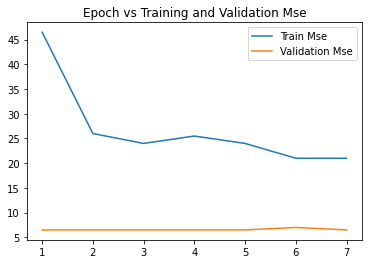

[6.5 6.5 6.5 6.5 6.5 7.  6.5]
[46.5 26.  24.  25.5 24.  21.  21. ]


In [ ]:
slp_overfitting_detection(X_train, y_train, X_validation, y_validation, lr=0.01, roh = 0.000001, num_iter=100)